In [2]:
import open3d as o3d
import numpy as np
import os
import glob
import pandas as pd
import pymeshlab as pml
import time
import matplotlib as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
from scipy.stats import wasserstein_distance

In [4]:
wasserstein_distance([0, 1, 3], [5, 6, 8])

5.0

In [5]:
df = pd.read_pickle("./normalized_features.pkl")

In [50]:
df

,class,path,V,S,c,D,R,E,C,A3,D1,D2,D3,D4
1,Bed,./features/Bed\D00031,-2.055427,2.165537,-0.124472,2.356489,-1.759977,-0.318678,-1.525549,"[0.023099824132818737, 0.0477212295096727, 0.0...","[0.0, 0.0, 0.00103, 0.004548, 0.006773, 0.0087...","[0.00293043370418822, 0.009647427819317258, 0....","[0.00024910910979008806, 0.002292003897707196,...","[0.00060952724106352, 0.004227656923238602, 0...."
1,Bed,./features/Bed\D00110,0.780919,0.926510,-0.123602,2.177104,0.992008,-0.503312,0.695245,"[0.029372249571585917, 0.05117459987175088, 0....","[0.0, 0.002383345585109841, 0.0034064939416215...","[0.0026554115887962634, 0.008329291040111217, ...","[0.0003381372837371973, 0.002266920369670086, ...","[0.0011810948749490778, 0.00736182441122921, 0..."
1,Bed,./features/Bed\D00121,1.375449,3.285247,-0.120832,3.208291,0.928726,-0.059787,0.723377,"[0.04691931606385565, 0.04627803839062314, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000166, ...","[0.013273937994947263, 0.0204919918308073, 0.0...","[0.0028724477136476785, 0.01413912611956426, 0...","[0.006390083359358109, 0.026984689424331965, 0..."
1,Bed,./features/Bed\D00184,6.039427,5.365166,-0.124456,3.088871,4.120797,0.316702,2.943712,"[0.027444291609353508, 0.02881880705264474, 0....","[0.0, 0.0005570818910379826, 0.001286189069793...","[0.010949500081511167, 0.0128867654868717, 0.0...","[0.0007773202559454495, 0.0030202443406683556,...","[0.001420185855189083, 0.005601677400629525, 0..."
1,Bed,./features/Bed\D00210,-1.292629,6.837063,-0.104162,3.499482,-0.353311,-0.172975,-0.393900,"[0.021696939138925238, 0.042127356470866, 0.04...","[0.0001380209791888367, 0.0, 0.001056160536401...","[0.0035544869647141657, 0.00803010012371695, 0...","[0.00035217150752416427, 0.002483209322940272,...","[0.0009728746142782361, 0.006261629204654985, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Jet,./features/Jet\m1297,0.093591,-0.831260,-0.108227,-0.558619,-0.105737,-0.680033,-0.231739,"[0.0883130576399233, 0.10216008411053212, 0.08...","[0.0029254739267761377, 0.018090930730778387, ...","[0.015712262565809477, 0.045324526731849384, 0...","[0.0013555720514056933, 0.01012827413168357, 0...","[0.0006014938264315003, 0.003617970353660355, ..."
1,Jet,./features/Jet\m1298,0.359070,-0.409759,-0.124670,-0.198678,0.566245,-0.436704,0.821232,"[0.03194485153992131, 0.05240944390368827, 0.0...","[0.0, 0.000281, 0.007125, 0.018093, 0.016419, ...","[0.005624798721418442, 0.013113862168427916, 0...","[0.0009873840924119483, 0.006215417797523237, ...","[0.0014021974766450548, 0.007817676295556405, ..."
1,Jet,./features/Jet\m1299,0.259864,-0.538576,-0.124490,-0.476498,0.669816,-0.512649,1.015715,"[0.034756964347701695, 0.05471840996691766, 0....","[0.0, 0.0016622144256609103, 0.006498838350147...","[0.006013841937871302, 0.015079111075550577, 0...","[0.0007723529653051444, 0.005634575000775354, ...","[0.0008146867809563462, 0.005311477575596228, ..."
1,Jet,./features/Jet\m1300,-0.139984,-0.142479,-0.123870,-0.406181,-0.402224,-0.450186,-0.977642,"[0.024974540274384813, 0.04639972469483342, 0....","[0.0, 0.0, 0.0026423514327405546, 0.0038785158...","[0.006416936872783426, 0.0182366625527327, 0.0...","[0.0009744336229622182, 0.005875614648518591, ...","[0.0020047461338826116, 0.009326123053179319, ..."


In [18]:
np.sum(df.iloc()[0]["A3"])

1.0

<BarContainer object of 40 artists>

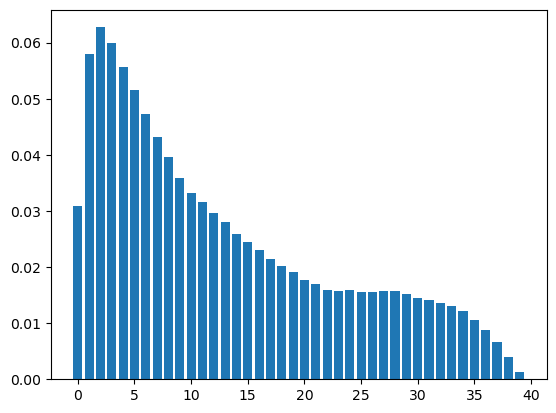

In [76]:
data = df[df["class"] == "Jet"].iloc()[0]["A3"]
plt.bar(x=range(len(data)), height=data)

<BarContainer object of 40 artists>

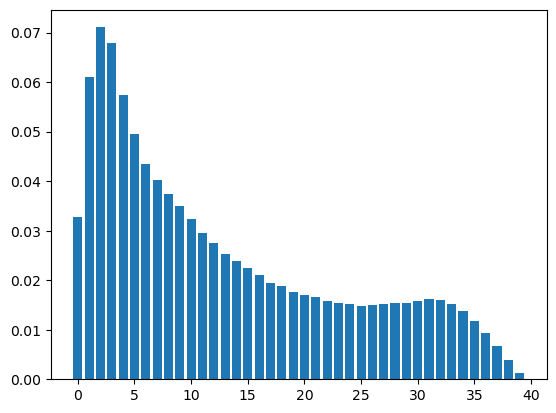

In [83]:
data2 = df[df["class"] == "Jet"].iloc()[3]["A3"]
plt.bar(x=range(len(data2)), height=data2)

In [113]:
wasserstein_distance(data,data2)

0.001557280577095858

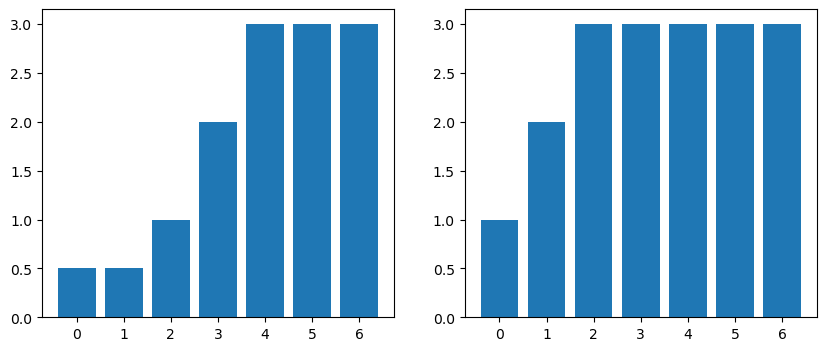

In [155]:
# v1 = [0,0,1,2,3,3,3]
# v2 = [3,3,3,2,1,0,0]
v1 = [0.5,0.5,1,2,3,3,3]
v2 = [1,2,3,3,3,3,3]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].bar(range(len(v1)),v1)
ax[1].bar(range(len(v2)),v2)

plt.show()
# plt.plot(v1)
# plt.plot(v2)

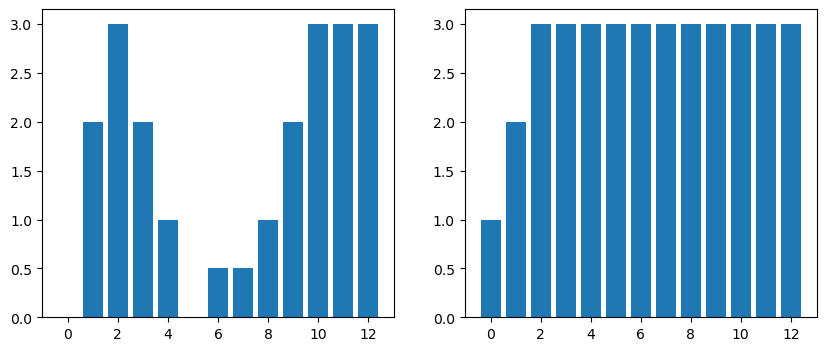

In [186]:
# v1 = [0,0,1,2,3,3,3]
# v2 = [3,3,3,2,1,0,0]
v1 = [0,2,3,2,1,0,0.5,0.5,1,2,3,3,3]
v2 = [1,2,3,3,3,3,3,3,3,3,3,3,3]
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].bar(range(len(v1)),v1)
ax[1].bar(range(len(v2)),v2)

plt.show()
# plt.plot(v1)
# plt.plot(v2)

In [184]:
from dit.divergences import earth_movers_distance

In [187]:
from emd import get_emd
get_emd(v1,v2)

0.0

In [168]:
wasserstein_distance(v1,v2)

1.7692307692307694

<BarContainer object of 40 artists>

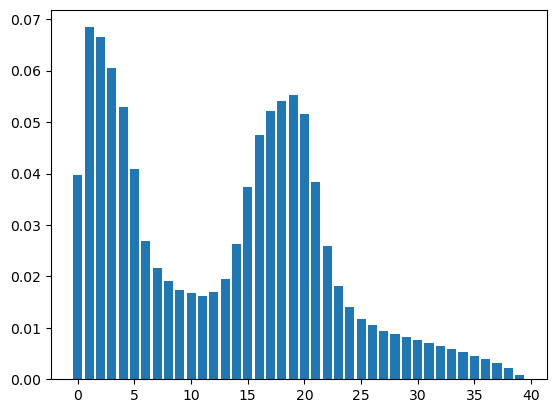

In [79]:
data3 = df[df["class"] == "Bed"].iloc()[8]["A3"]
plt.bar(x=range(len(data3)), height=data3)

In [80]:
wasserstein_distance(data,data3)

0.0044851073021652515

ValueError: setting an array element with a sequence.

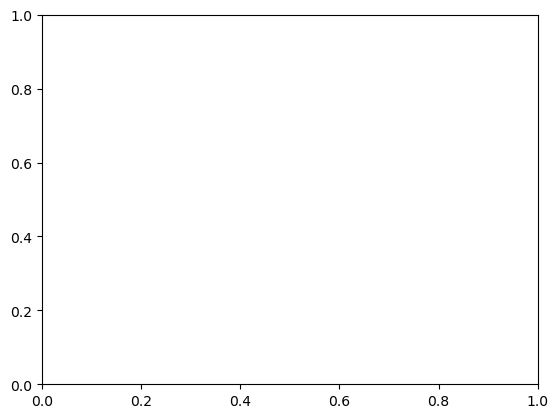

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'Class' and 'A3' columns.

# Group the DataFrame by the 'Class' column
grouped = df.groupby('class')

# Create a line plot for each group
for name, group in grouped:
    plt.plot(group.index, group['A3'], label=f'Class {name}')

# Customize the plot
plt.xlabel('Index')
plt.ylabel('A3 Values')
plt.title('Line Plot of A3 Values Grouped by Class')
plt.legend()

# Show the plot
plt.show()


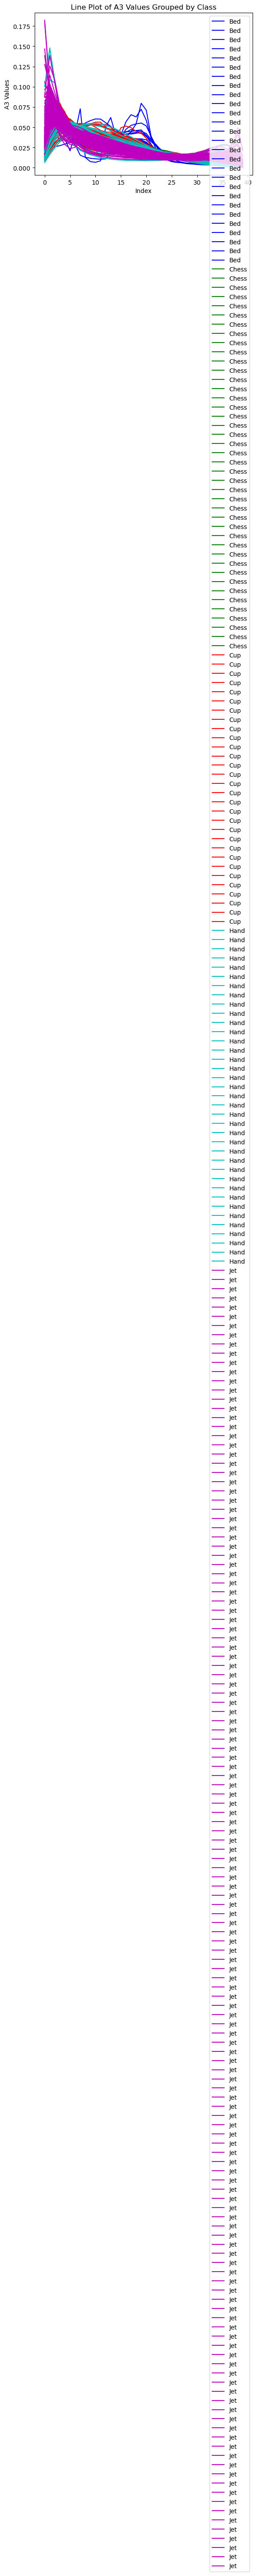

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'Class' and 'A3' columns.

# Define a dictionary of colors for each class
class_colors = {
    'Bed': 'b',    # Blue
    'Chess': 'g',  # Green
    'Cup': 'r',    # Red
    'Hand': 'c',   # Cyan
    'Jet': 'm'     # Magenta
}

# Group the DataFrame by the 'Class' column
grouped = df.groupby('class')

# Create a line plot for each group
for name, group in grouped:
    color = class_colors[name]  # Get the color for the class
    for index, row in group.iterrows():
        plt.plot(range(len(row['A3'])), row['A3'], label=name, color=color)

# Customize the plot
plt.xlabel('Index')
plt.ylabel('A3 Values')
plt.title('Line Plot of A3 Values Grouped by Class')
plt.legend()

# Show the plot
plt.show()


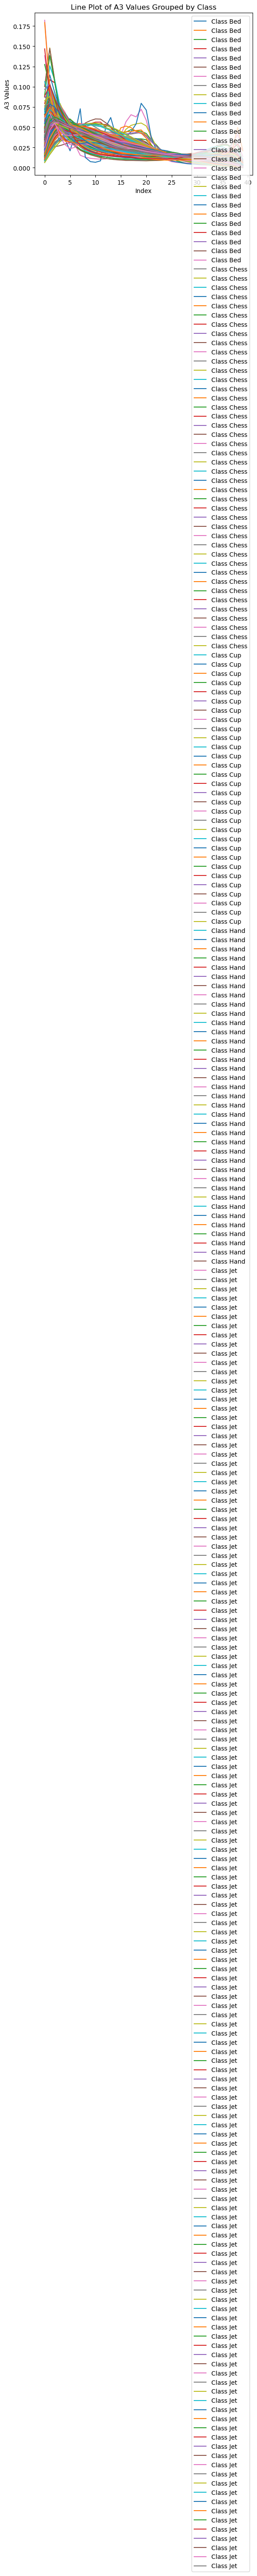

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'Class' and 'A3' columns.

# Group the DataFrame by the 'Class' column
grouped = df.groupby('class')

# Create a line plot for each group
for name, group in grouped:
    for index, row in group.iterrows():
        # 'A3' contains a list of values, so you need to iterate through it
        plt.plot(range(len(row['A3'])), row['A3'], label=f'Class {row["class"]}')

# Customize the plot
plt.xlabel('Index')
plt.ylabel('A3 Values')
plt.title('Line Plot of A3 Values Grouped by Class')
plt.legend()

# Show the plot
plt.show()
